In [1]:
cd

C:\Users\ASUS


In [8]:
import pandas as pd
from sklearn.linear_model import LassoCV
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv(r"C:\Users\ASUS\hp.csv",encoding='latin1')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 16 columns):
Property Type         136 non-null object
Bed                   136 non-null int64
Bath                  136 non-null int64
Area                  136 non-null object
Location              136 non-null object
Price                 136 non-null object
View                  136 non-null object
Balcony_or_Terrace    136 non-null object
Lobby_in_Building     136 non-null object
ElectricityBackup     136 non-null object
Intercom              136 non-null object
CCTV_Security         136 non-null object
Pet Policy            136 non-null object
Maintenance_Staff     136 non-null object
CleaningServices      136 non-null object
Tiles                 136 non-null object
dtypes: int64(2), object(14)
memory usage: 17.1+ KB


In [4]:
df[:10]

,Property Type,Bed,Bath,Area,Location,Price,View,Balcony_or_Terrace,Lobby_in_Building,ElectricityBackup,Intercom,CCTV_Security,Pet Policy,Maintenance_Staff,CleaningServices,Tiles
0,Apartment,2,2,775,Sector 10,"3,800,000",West,Yes,Yes,Yes,Yes,Yes,Not allowed,Yes,Yes,Yes
1,Apartment,2,2,765,Sector 10,"3,978,000",East,Yes,Yes,Yes,Yes,No,Not allowed,Yes,Yes,No
2,Apartment,2,2,772,Sector 10,"4,000,000",South,Yes,No,Yes,No,No,Not allowed,Yes,Yes,Yes
3,Apartment,2,2,1008,Sector 10,"4,200,000",Nort,Yes,No,Yes,Yes,No,Not allowed,Yes,Yes,Yes
4,Apartment,2,2,"1,005",Sector 10,"4,200,000",East,Yes,Yes,Yes,Yes,No,Not allowed,Yes,Yes,Yes
5,Apartment,2,2,910,Sector 13,"4,200,000",West,Yes,Yes,No,Yes,No,Not allowed,Yes,Yes,No
6,Apartment,2,2,950,Sector 10,"4,500,000",South,Yes,Yes,Yes,Yes,Yes,Not allowed,Yes,Yes,Yes
7,Apartment,2,2,"1,050",Sector 14,"4,500,000",South,Yes,No,No,No,No,Not allowed,Yes,Yes,Yes
8,Apartment,2,2,950,Sector 12,"4,500,000",East,Yes,No,No,No,No,Not allowed,Yes,Yes,Yes
9,Apartment,2,2,900,Sector 10,"4,500,000",South,Yes,Yes,Yes,Yes,Yes,Not allowed,Yes,Yes,No


In [5]:
df.groupby('Property Type')['Property Type'].agg('count')

Property Type
Apartment    136
Name: Property Type, dtype: int64

In [6]:
df.groupby('Location')['Location'].agg('count')

Location
Sector 1      1
Sector 10    66
Sector 11    12
Sector 12    22
Sector 13     5
Sector 14    10
Sector 3      1
Sector 4      1
Sector 5     10
Sector 6      1
Sector 7      1
Sector 9      3
Sector D      3
Name: Location, dtype: int64

In [7]:
df.groupby('Location')['Location'].agg('count')

Location
Sector 1      1
Sector 10    66
Sector 11    12
Sector 12    22
Sector 13     5
Sector 14    10
Sector 3      1
Sector 4      1
Sector 5     10
Sector 6      1
Sector 7      1
Sector 9      3
Sector D      3
Name: Location, dtype: int64

In [10]:
df['Location']

0      Sector 10
1      Sector 10
2      Sector 10
3      Sector 10
4      Sector 10
         ...    
131    Sector 10
132    Sector 10
133    Sector 10
134    Sector 10
135    Sector 10
Name: Location, Length: 136, dtype: object

In [11]:
df = df.assign(Location='Uttara')

In [12]:
df.groupby('Location')['Location'].agg('count')

Location
Uttara    136
Name: Location, dtype: int64

In [13]:
df["View"]= df["View"].str.lower()
df["View"]= df["View"].replace("nortg", "north") 
df["View"]= df["View"].replace("nort", "north") 
df.groupby('View')['View'].agg('count') 
df1 = df.drop('View',axis='columns')
df2 = df1.drop('Pet Policy',axis='columns')


In [14]:
df.head()

,Property Type,Bed,Bath,Area,Location,Price,View,Balcony_or_Terrace,Lobby_in_Building,ElectricityBackup,Intercom,CCTV_Security,Pet Policy,Maintenance_Staff,CleaningServices,Tiles
0,Apartment,2,2,775,Uttara,"3,800,000",west,Yes,Yes,Yes,Yes,Yes,Not allowed,Yes,Yes,Yes
1,Apartment,2,2,765,Uttara,"3,978,000",east,Yes,Yes,Yes,Yes,No,Not allowed,Yes,Yes,No
2,Apartment,2,2,772,Uttara,"4,000,000",south,Yes,No,Yes,No,No,Not allowed,Yes,Yes,Yes
3,Apartment,2,2,1008,Uttara,"4,200,000",north,Yes,No,Yes,Yes,No,Not allowed,Yes,Yes,Yes
4,Apartment,2,2,"1,005",Uttara,"4,200,000",east,Yes,Yes,Yes,Yes,No,Not allowed,Yes,Yes,Yes


In [15]:
df2['Tiles'] = df2['Tiles'].apply(lambda x: 0 if x=='No' else 1)
df2['Balcony_or_Terrace'] = df2['Balcony_or_Terrace'].apply(lambda x: 0 if x=='No' else 1)
df2['Lobby_in_Building'] = df2['Lobby_in_Building'].apply(lambda x: 0 if x=='No' else 1)
df2['Intercom'] = df2['Intercom'].apply(lambda x: 0 if x=='No' else 1)
df2['CCTV_Security'] = df2['CCTV_Security'].apply(lambda x: 0 if x=='No' else 1)
df2['Maintenance_Staff'] = df2['Maintenance_Staff'].apply(lambda x: 0 if x=='No' else 1)
df2['CleaningServices'] = df2['CleaningServices'].apply(lambda x: 0 if x=='No' else 1)
df2['ElectricityBackup'] = df2['ElectricityBackup'].apply(lambda x: 0 if x=='No' else 1)

In [16]:
df2.head()

,Property Type,Bed,Bath,Area,Location,Price,Balcony_or_Terrace,Lobby_in_Building,ElectricityBackup,Intercom,CCTV_Security,Maintenance_Staff,CleaningServices,Tiles
0,Apartment,2,2,775,Uttara,"3,800,000",1,1,1,1,1,1,1,1
1,Apartment,2,2,765,Uttara,"3,978,000",1,1,1,1,0,1,1,0
2,Apartment,2,2,772,Uttara,"4,000,000",1,0,1,0,0,1,1,1
3,Apartment,2,2,1008,Uttara,"4,200,000",1,0,1,1,0,1,1,1
4,Apartment,2,2,"1,005",Uttara,"4,200,000",1,1,1,1,0,1,1,1


In [17]:
df2.head()
df2['Intercom'] = df2.Intercom.astype(int)
df2['CCTV_Security'] = df2.CCTV_Security.astype(int)
df2['Maintenance_Staff'] = df2.Maintenance_Staff.astype(int)
df2['CleaningServices'] = df2.CleaningServices.astype(int)
df2['Tiles'] = df2.Tiles.astype(int)
df2['Balcony_or_Terrace'] = df2.Balcony_or_Terrace.astype(int)
df2['Lobby_in_Building'] = df2.Lobby_in_Building.astype(int)
df2['ElectricityBackup'] = df2.ElectricityBackup.astype(int)

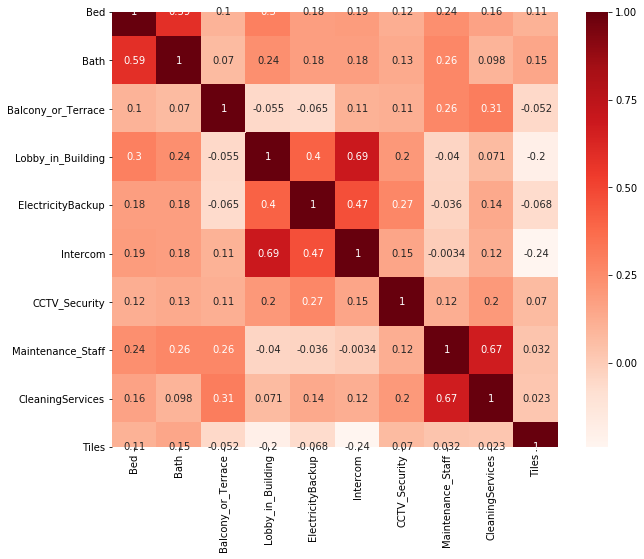

In [18]:
plt.figure(figsize=(10,8))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 14 columns):
Property Type         136 non-null object
Bed                   136 non-null int64
Bath                  136 non-null int64
Area                  136 non-null object
Location              136 non-null object
Price                 136 non-null object
Balcony_or_Terrace    136 non-null int32
Lobby_in_Building     136 non-null int32
ElectricityBackup     136 non-null int32
Intercom              136 non-null int32
CCTV_Security         136 non-null int32
Maintenance_Staff     136 non-null int32
CleaningServices      136 non-null int32
Tiles                 136 non-null int32
dtypes: int32(8), int64(2), object(4)
memory usage: 10.8+ KB


In [20]:
df2['Price'] = (df2['Price'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
df2['Area'] = (df2['Area'].str.split()).apply(lambda x: float(x[0].replace(',', '')))

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 14 columns):
Property Type         136 non-null object
Bed                   136 non-null int64
Bath                  136 non-null int64
Area                  136 non-null float64
Location              136 non-null object
Price                 136 non-null float64
Balcony_or_Terrace    136 non-null int32
Lobby_in_Building     136 non-null int32
ElectricityBackup     136 non-null int32
Intercom              136 non-null int32
CCTV_Security         136 non-null int32
Maintenance_Staff     136 non-null int32
CleaningServices      136 non-null int32
Tiles                 136 non-null int32
dtypes: float64(2), int32(8), int64(2), object(2)
memory usage: 10.8+ KB


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 14 columns):
Property Type         136 non-null object
Bed                   136 non-null int64
Bath                  136 non-null int64
Area                  136 non-null float64
Location              136 non-null object
Price                 136 non-null float64
Balcony_or_Terrace    136 non-null int32
Lobby_in_Building     136 non-null int32
ElectricityBackup     136 non-null int32
Intercom              136 non-null int32
CCTV_Security         136 non-null int32
Maintenance_Staff     136 non-null int32
CleaningServices      136 non-null int32
Tiles                 136 non-null int32
dtypes: float64(2), int32(8), int64(2), object(2)
memory usage: 10.8+ KB


In [23]:
df2.head()


,Property Type,Bed,Bath,Area,Location,Price,Balcony_or_Terrace,Lobby_in_Building,ElectricityBackup,Intercom,CCTV_Security,Maintenance_Staff,CleaningServices,Tiles
0,Apartment,2,2,775.0,Uttara,3800000.0,1,1,1,1,1,1,1,1
1,Apartment,2,2,765.0,Uttara,3978000.0,1,1,1,1,0,1,1,0
2,Apartment,2,2,772.0,Uttara,4000000.0,1,0,1,0,0,1,1,1
3,Apartment,2,2,1008.0,Uttara,4200000.0,1,0,1,1,0,1,1,1
4,Apartment,2,2,1005.0,Uttara,4200000.0,1,1,1,1,0,1,1,1


In [24]:
dummies = pd.get_dummies(df2.Location)
dummies.head(100)

,Uttara
0,1
1,1
2,1
3,1
4,1
...,...
95,1
96,1
97,1
98,1


In [25]:
df3 = pd.concat([df2,dummies],axis='columns')
df3.head()

,Property Type,Bed,Bath,Area,Location,Price,Balcony_or_Terrace,Lobby_in_Building,ElectricityBackup,Intercom,CCTV_Security,Maintenance_Staff,CleaningServices,Tiles,Uttara
0,Apartment,2,2,775.0,Uttara,3800000.0,1,1,1,1,1,1,1,1,1
1,Apartment,2,2,765.0,Uttara,3978000.0,1,1,1,1,0,1,1,0,1
2,Apartment,2,2,772.0,Uttara,4000000.0,1,0,1,0,0,1,1,1,1
3,Apartment,2,2,1008.0,Uttara,4200000.0,1,0,1,1,0,1,1,1,1
4,Apartment,2,2,1005.0,Uttara,4200000.0,1,1,1,1,0,1,1,1,1


In [26]:
df4 = df3.drop('Location',axis='columns')
df5 = df4.drop('Property Type',axis='columns')
df5.head(2)

,Bed,Bath,Area,Price,Balcony_or_Terrace,Lobby_in_Building,ElectricityBackup,Intercom,CCTV_Security,Maintenance_Staff,CleaningServices,Tiles,Uttara
0,2,2,775.0,3800000.0,1,1,1,1,1,1,1,1,1
1,2,2,765.0,3978000.0,1,1,1,1,0,1,1,0,1


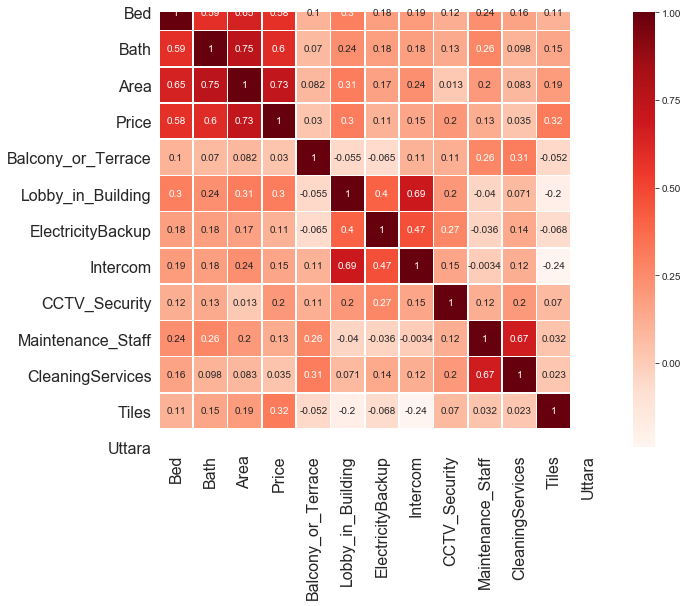

In [27]:
#co-relation without mask 
plt.figure(figsize=(10,8))
cor = df5.corr()
sns.set_style('white')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, annot_kws={"size": 10},linewidth=.7)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [28]:
#Correlation with output variable
cor_target = abs(cor["Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Bed      0.581955
Bath     0.601059
Area     0.731705
Price    1.000000
Name: Price, dtype: float64

In [29]:
#creating mask 
mask = np.zeros_like(df5.corr())
triangel_indices = np.triu_indices_from(mask)
mask[triangel_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

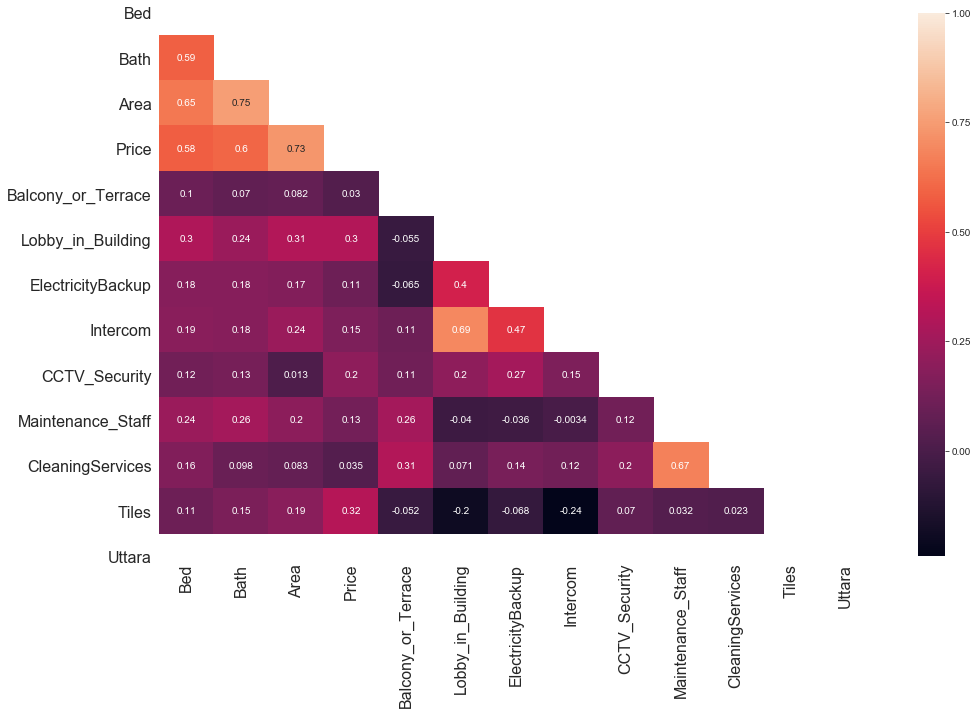

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(df5.corr(), mask=mask, annot=True,annot_kws={"size": 10})
sns.set_style('white')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [31]:
X = df5.drop(['Price'],axis='columns')
X.head()

,Bed,Bath,Area,Balcony_or_Terrace,Lobby_in_Building,ElectricityBackup,Intercom,CCTV_Security,Maintenance_Staff,CleaningServices,Tiles,Uttara
0,2,2,775.0,1,1,1,1,1,1,1,1,1
1,2,2,765.0,1,1,1,1,0,1,1,0,1
2,2,2,772.0,1,0,1,0,0,1,1,1,1
3,2,2,1008.0,1,0,1,1,0,1,1,1,1
4,2,2,1005.0,1,1,1,1,0,1,1,1,1


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
Bed                   136 non-null int64
Bath                  136 non-null int64
Area                  136 non-null float64
Balcony_or_Terrace    136 non-null int32
Lobby_in_Building     136 non-null int32
ElectricityBackup     136 non-null int32
Intercom              136 non-null int32
CCTV_Security         136 non-null int32
Maintenance_Staff     136 non-null int32
CleaningServices      136 non-null int32
Tiles                 136 non-null int32
Uttara                136 non-null uint8
dtypes: float64(1), int32(8), int64(2), uint8(1)
memory usage: 7.7 KB


In [33]:
y = df5.Price
y.head()

0    3800000.0
1    3978000.0
2    4000000.0
3    4200000.0
4    4200000.0
Name: Price, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7522428885676558

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.40806037, 0.57472053, 0.12560038, 0.52896738, 0.3866626 ])

In [37]:
X.columns

Index(['Bed', 'Bath', 'Area', 'Balcony_or_Terrace', 'Lobby_in_Building',
       'ElectricityBackup', 'Intercom', 'CCTV_Security', 'Maintenance_Staff',
       'CleaningServices', 'Tiles', 'Uttara'],
      dtype='object')

In [38]:
#Using lesso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)


Best alpha using built-in LassoCV: 210445.896512
Best score using built-in LassoCV: 0.535392


In [39]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 11 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

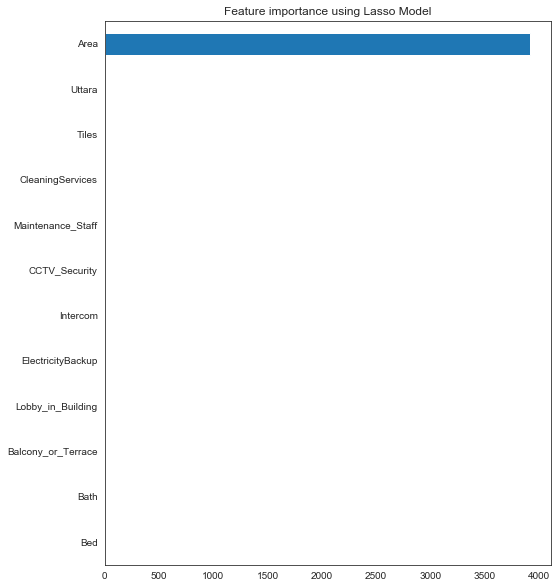

In [40]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.404802,{'normalize': True}
1,lasso,0.404809,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-0.316833,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [42]:
np.where(X.columns=="Uttara")[0][0]
X.columns

Index(['Bed', 'Bath', 'Area', 'Balcony_or_Terrace', 'Lobby_in_Building',
       'ElectricityBackup', 'Intercom', 'CCTV_Security', 'Maintenance_Staff',
       'CleaningServices', 'Tiles', 'Uttara'],
      dtype='object')

In [43]:
def predict_price(location,Bed,Bath,Area,Balcony_or_Terrace,
                 Lobby_in_Building,ElectricityBackup,
                 Intercom,CCTV_Security,Maintenance_Staff,CleaningServices,
                 Tiles):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Bed
    x[1] = Bath
    x[2] = Area
    x[3] = Balcony_or_Terrace
    x[4] = Lobby_in_Building
    x[5] = ElectricityBackup
    x[6] = Intercom
    x[7] = CCTV_Security
    x[8] = Maintenance_Staff
    x[9] = CleaningServices
    x[10] = Tiles
    
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [44]:
predict_price("Uttara",2,2,775.0,1,1,1,1,1,1,1,1)

5261572.410812572

In [46]:
cof = lr_clf.coef_.astype(str)

In [47]:
cof

array(['388096.3859268371', '188701.78158385397', '2784.6810733735524',
       '-7.275957614183426e-11', '351481.3403989193', '-186817.392897882',
       '-201627.2670991194', '470497.6464787935', '-302917.2119589861',
       '-186321.44693642066', '448784.0104019116', '0.0'], dtype='<U32')

In [48]:
lr_clf.intercept_

1556768.56553947

In [64]:
predict_price("Uttara",5,5,1000,1,1,1,1,1,1,1,1)

7618520.154853694

In [65]:
y_pred = lr_clf.predict(X_test)

In [66]:
coeff_df = pd.DataFrame(lr_clf.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Bed,3.880964e+05
Bath,1.887018e+05
Area,2.784681e+03
Balcony_or_Terrace,-7.275958e-11
Lobby_in_Building,3.514813e+05
ElectricityBackup,-1.868174e+05
Intercom,-2.016273e+05
CCTV_Security,4.704976e+05
Maintenance_Staff,-3.029172e+05
CleaningServices,-1.863214e+05


In [67]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

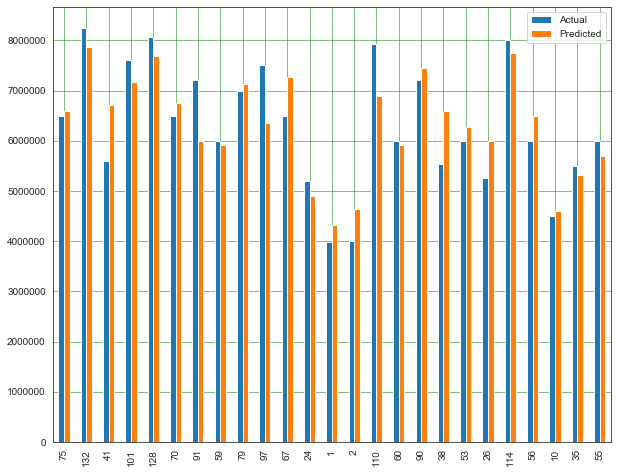

In [68]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [74]:
predict_price("Uttara",2,2,775.0,1,0,0,0,1,1,1,0)

4849751.720008742